In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv
/kaggle/input/clusters-data/cluster_2.csv
/kaggle/input/clusters-data/cluster_3.csv
/kaggle/input/clusters-data/cluster_0.csv
/kaggle/input/clusters-data/cluster_1.csv


In [2]:
data = pd.read_csv('/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv')
data.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
0,0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


In [3]:
len(data['comment_parent_id'].unique())

data_parent = data.query('comment_parent_id == comment_id')
data_parent

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit


In [4]:
type(data['comment_body'][0])

str

In [5]:
text = " ".join(str(item) for item in data['comment_body'])

#for item in data['comment_body']:
    #print(item)

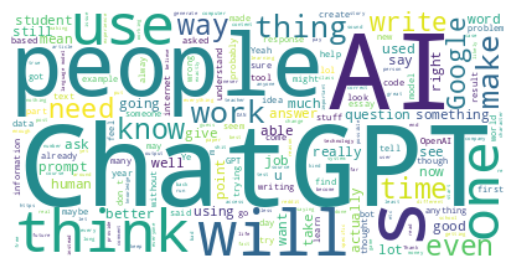

In [6]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


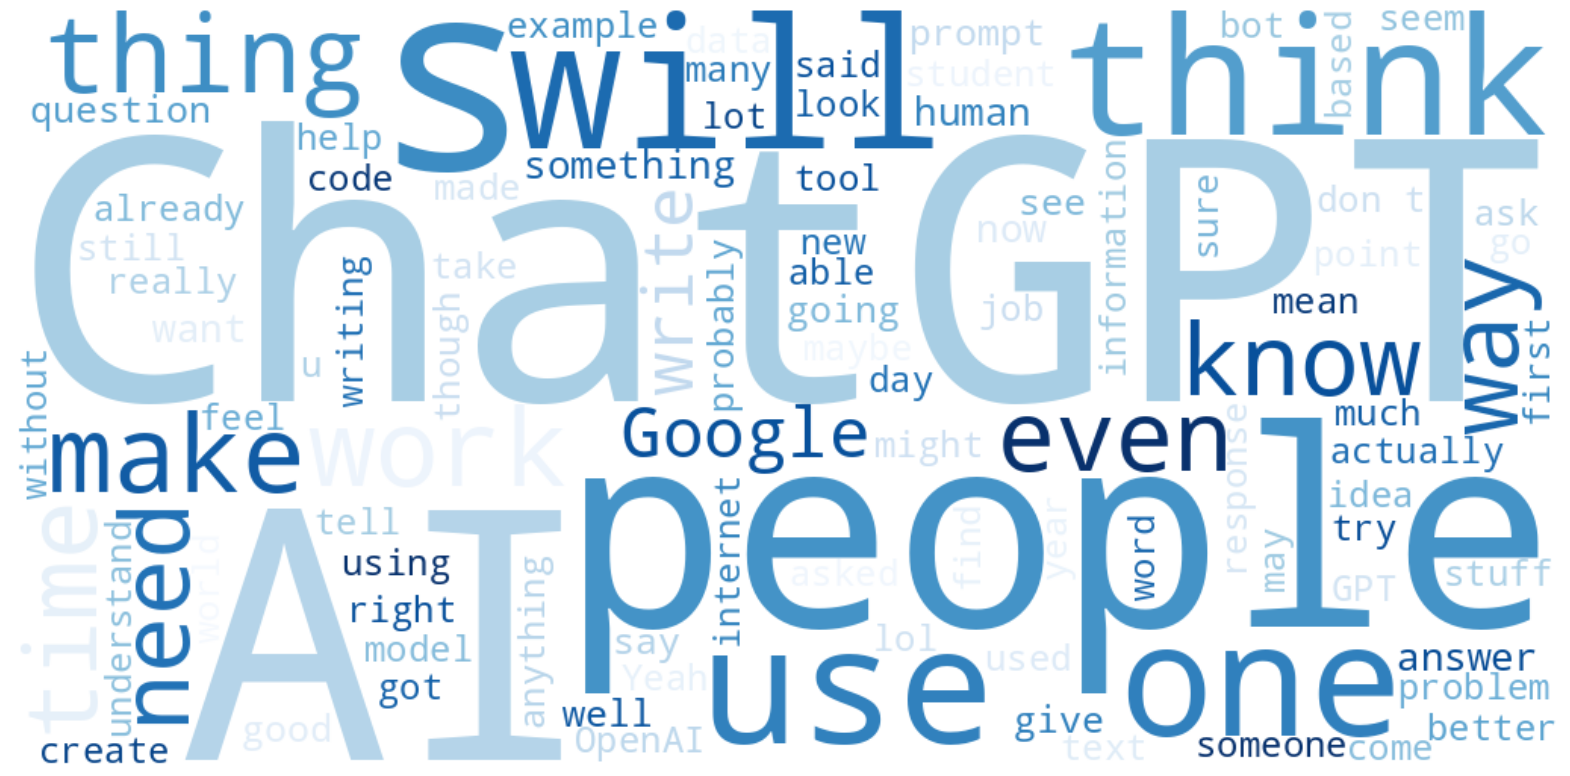

In [7]:
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=1024, 
                      height=500,
                      colormap="Blues"
                     ).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [8]:
data['comment_body'][6]

'People on Reddit seek the karma and the fame,\nUsing ChatCPT Assistant to write Clickbait for game.\nWith titles so outrageous they grab your attention, Hoping for up votes and a little bit of affection.\n\nThey ask for advice or tell a funny joke,\nBut the real intent is to make the front page and evoke\nA reaction from others a comment or a share,\nAnything to get more of votes and climb up the Reddit ladder.\n\nSome may call it lazy, or a cheap ploy for fame,\nBut for those on Reddit it’s just a fun little game.\nThey’ll keep using ChatCPT Assistant, to come up with new ideas,\nHoping to climb the ranks and reach the Reddit frontiers.\n\nBy yours truly … \n\nChatCPT Assistant'

***> Named Entity Recognition using Spacy***

In [9]:
# command to run before code
! pip install spacy
! python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [10]:
#using spacy
 
# imports and load spacy english language package
import spacy
from spacy import displacy
from spacy import tokenizer
nlp = spacy.load('en_core_web_sm')
 
#Load the text and process it
# I copied the text from python wiki
text =(data['comment_body'][6])
# text2 = # copy the paragraphs from  https://www.python.org/doc/essays/
doc = nlp(text)
#doc2 = nlp(text2)
sentences = list(doc.sents)
#print(sentences)
# tokenization
#for token in doc:
    #print(token.text)
# print entities
ents = [e.label_ for e in doc.ents]
print(ents)
# now we use displaycy function on doc2
#displacy.render(doc, style='ent', jupyter=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

['NORP', 'ORG', 'PERSON', 'NORP', 'NORP', 'NORP']


In [11]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
print(len(comments))
entities0 = []
for comment in comments:
    doc = nlp(comment)
    entities0.append([e.label_ for e in doc.ents])
print(entities0)

500
[[], [], [], ['ORG'], [], [], ['CARDINAL'], [], [], [], [], [], [], [], [], [], ['GPE'], [], [], [], [], [], ['CARDINAL', 'CARDINAL'], [], [], [], [], [], ['ORG'], [], [], ['ORG'], [], [], [], [], ['DATE'], ['ORG', 'DATE'], ['CARDINAL'], [], [], ['NORP'], [], [], [], [], [], ['GPE', 'CARDINAL'], [], [], [], [], [], [], [], [], ['CARDINAL'], [], ['ORG'], ['ORDINAL'], [], [], [], [], [], [], [], [], [], ['DATE'], [], [], ['PERSON'], [], [], ['CARDINAL'], [], ['ORG', 'CARDINAL'], ['PERSON'], [], [], [], [], [], [], ['CARDINAL'], ['ORG'], ['DATE'], ['ORG'], [], ['ORG', 'PERSON'], [], ['ORDINAL', 'NORP'], [], [], [], [], [], ['CARDINAL'], [], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], ['ORG', 'ORG'], [], [], [], [], [], [], [], [], ['ORG'], [], [], [], [], [], ['QUANTITY'], [], [], [], [], ['CARDINAL'], [], [], [], [], [], [], ['ORG', 'ORG'], [], [], [], [], [], [], ['PERSON'], [], ['CARDINAL'], [], [], [], [], [], [], [], [], [], [], ['DATE', 'CARDINAL'], [], [], [

In [12]:
from collections import Counter
entities_set = set()
entities_list0 = [item for row in entities0 for item in row]
#print(entities_list)
entities_set.update(entities_list0)
print(entities_set)
dict_c0 = dict(Counter(entities_list0))

{'CARDINAL', 'MONEY', 'PERSON', 'PRODUCT', 'ORDINAL', 'NORP', 'ORG', 'QUANTITY', 'DATE', 'GPE'}


In [13]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
print(len(comments))
entities1 = []
for comment in comments:
    doc = nlp(comment)
    entities1.append([e.label_ for e in doc.ents])
print(entities1)

500
[['ORG', 'ORG', 'ORG', 'ORG'], [], [], [], ['CARDINAL', 'DATE'], ['NORP'], ['DATE'], [], ['CARDINAL', 'CARDINAL', 'CARDINAL', 'DATE', 'NORP', 'DATE'], [], [], [], ['CARDINAL'], [], [], ['ORG'], [], ['CARDINAL', 'ORDINAL', 'ORDINAL', 'CARDINAL', 'DATE', 'PERSON', 'DATE', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'PERSON', 'ORG', 'ORG', 'CARDINAL', 'PERSON', 'CARDINAL', 'ORG', 'ORG', 'CARDINAL', 'ORG', 'CARDINAL', 'ORG', 'ORG', 'ORG', 'CARDINAL', 'CARDINAL'], ['NORP'], [], [], ['CARDINAL', 'DATE', 'ORG'], [], [], ['DATE'], ['NORP'], [], ['TIME', 'CARDINAL'], [], ['DATE'], [], [], [], ['GPE'], ['CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL'], [], ['CARDINAL'], [], ['ORG', 'NORP', 'NORP'], [], ['CARDINAL'], ['DATE'], [], [], [], [], ['ORG'], [], [], [], ['ORG', 'GPE', 'ORDINAL', 'GPE', 'ORG', 'CARDINAL', 'ORDINAL', 'CARDINAL', 'GPE', 'CARDINAL', 'CARDINAL', 'GPE', 'GPE', 'GPE', 'CARDINAL'], [], ['ORG'], [], [], [], [], [], [], ['DATE', 'DATE', 'DATE', 'PER

In [14]:
entities_list1 = [item for row in entities1 for item in row]
#print(entities_list)
entities_set.update(entities_list1)
print(entities_set)
dict_c1 = dict(Counter(entities_list1))

{'CARDINAL', 'MONEY', 'PERSON', 'PRODUCT', 'ORDINAL', 'NORP', 'TIME', 'LANGUAGE', 'ORG', 'WORK_OF_ART', 'QUANTITY', 'PERCENT', 'DATE', 'GPE', 'LOC'}


In [15]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
print(len(comments))
entities2 = []
for comment in comments:
    doc = nlp(comment)
    entities2.append([e.label_ for e in doc.ents])
print(entities2)

500
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['DATE'], [], ['GPE'], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], ['CARDINAL'], ['PERSON'], [], [], [], ['GPE'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['GPE'], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['ORG'], [], [], [], [], [], [], [], [], [], [], [], ['ORG'], [], [], ['CARDINAL'], [], [], [], [], [], [], [], [], [], ['ORG'], [], [], ['ORG'], [], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

In [16]:
entities_list2 = [item for row in entities2 for item in row]
#print(entities_list)
entities_set.update(entities_list2)
print(entities_set)
dict_c2 = dict(Counter(entities_list2))

{'CARDINAL', 'MONEY', 'PERSON', 'PRODUCT', 'ORDINAL', 'NORP', 'TIME', 'LANGUAGE', 'ORG', 'WORK_OF_ART', 'QUANTITY', 'PERCENT', 'DATE', 'GPE', 'LOC'}


In [17]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
print(len(comments))
entities3 = []
for comment in comments:
    doc = nlp(comment)
    entities3.append([e.label_ for e in doc.ents])
print(entities3)

500
[[], [], ['ORG'], [], ['PERSON'], [], [], ['PERSON'], [], ['DATE', 'CARDINAL', 'CARDINAL'], [], [], ['CARDINAL'], ['CARDINAL', 'CARDINAL', 'CARDINAL'], ['ORG'], [], [], [], ['ORG'], [], [], [], ['ORG'], [], [], [], [], [], [], [], [], [], ['CARDINAL'], [], [], ['ORDINAL'], [], ['ORG'], ['CARDINAL', 'ORG'], [], [], ['PERSON', 'PERSON'], [], ['CARDINAL'], [], [], [], ['ORDINAL'], ['ORG'], [], [], ['DATE', 'PRODUCT', 'CARDINAL'], [], ['CARDINAL', 'ORG'], [], [], [], [], ['ORDINAL'], [], [], [], [], [], [], [], [], [], [], [], ['DATE', 'PERSON', 'ORG', 'ORG'], [], [], [], ['CARDINAL', 'ORG'], [], [], [], [], ['ORG'], [], [], ['GPE'], [], [], [], ['ORG', 'ORG'], [], ['ORG'], ['ORG', 'ORG'], [], ['CARDINAL'], ['ORG'], [], [], [], ['DATE'], [], ['ORG'], ['DATE', 'DATE'], [], [], [], [], [], [], ['ORDINAL'], ['GPE', 'PERSON', 'MONEY'], [], [], [], [], [], [], ['CARDINAL'], [], [], [], ['ORG'], [], ['ORG'], [], [], [], [], [], [], [], ['CARDINAL'], [], [], [], [], [], [], ['PERSON'], ['DATE

In [18]:
entities_list3 = [item for row in entities3 for item in row]
#print(entities_list)
entities_set.update(entities_list3)
print(entities_set)
dict_c3 = dict(Counter(entities_list3))
print(dict_c3)

{'CARDINAL', 'MONEY', 'PERSON', 'PRODUCT', 'ORDINAL', 'LAW', 'NORP', 'FAC', 'TIME', 'LANGUAGE', 'ORG', 'WORK_OF_ART', 'QUANTITY', 'PERCENT', 'DATE', 'GPE', 'LOC'}
{'ORG': 86, 'PERSON': 34, 'DATE': 37, 'CARDINAL': 77, 'ORDINAL': 8, 'PRODUCT': 2, 'GPE': 11, 'MONEY': 7, 'FAC': 1, 'TIME': 4, 'NORP': 2, 'LAW': 1, 'LANGUAGE': 1, 'QUANTITY': 2, 'LOC': 1}


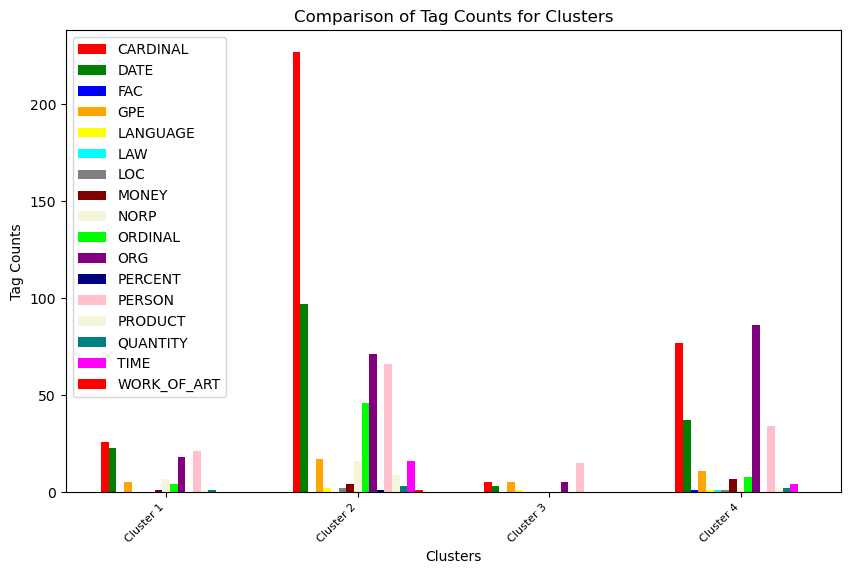

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Tag counts for each cluster
tag_counts = {
    'Cluster 1': dict_c0,
    'Cluster 2': dict_c1,
    'Cluster 3': dict_c2,
    'Cluster 4': dict_c3
}

# Get all unique tags
tags = sorted(set(tag for cluster_tags in tag_counts.values() for tag in cluster_tags.keys()))

# Get the count for each tag in each cluster
counts = [[tag_counts[cluster].get(tag, 0) for tag in tags] for cluster in clusters]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the spacing between clusters
bar_width = 0.04
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'gray','maroon',
          'Beige', 'lime', 'purple', 'Navy','Pink', 'Beige', 'Teal', 'Magenta'] 

# Set the positions of the bars on the x-axis
x = np.arange(len(clusters))

# Plot the bars for each tag
for i, tag in enumerate(tags):
    plt.bar(x + i * (bar_width), [count[i] for count in counts], width=bar_width, label=tag, color=colors[i % len(colors)])

# Set the x-axis labels and title
plt.xlabel('Clusters')
plt.ylabel('Tag Counts')
plt.title('Comparison of Tag Counts for Clusters')

# Set the x-axis tick positions and labels with increased boundaries
plt.xticks(x + ((len(tags) - 1) * bar_width) / 2, clusters, fontsize=8, rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()

***Named Entity Recognition using NLTK***

In [20]:
! pip install nltk

In [21]:
#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
    

In [22]:
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('words')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
text='cannot help thinking chatgpt writing entire thread real time fookin real anymore unreal'
for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            print(chunk.label())


[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities_dict1 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict1:
                    entities_dict1[chunk.label()] = entities_dict1[chunk.label()] +1
                else:
                    entities_dict1[chunk.label()] = 1

print(entities_dict1)

{}


In [24]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities_dict2 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict2:
                    entities_dict2[chunk.label()] = entities_dict2[chunk.label()] +1
                else:
                    entities_dict2[chunk.label()] = 1

print(entities_dict2)

{}


In [25]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities_dict3 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict3:
                    entities_dict3[chunk.label()] = entities_dict3[chunk.label()] +1
                else:
                    entities_dict3[chunk.label()] = 1

print(entities_dict3)

{}


In [26]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities_dict0 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict0:
                    entities_dict0[chunk.label()] = entities_dict0[chunk.label()] +1
                else:
                    entities_dict0[chunk.label()] = 1

print(entities_dict0)

{}


In [27]:
#https://medium.com/quantrium-tech/top-3-packages-for-named-entity-recognition-e9e14f6f0a2a

***Named Entity Recognition using flair***

In [28]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.2/387.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - \ done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=633c07168b559a46d6576693f8ce0ccd98437976bf39c9326fcd6f6281c9714c
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Created wheel for pptree: filename=pptree-3.1-py3-none-any.whl size=4629 sha256=cab4ad5b59499f74a66e8384318e6f1e661e5347d0129048c221a785368ff885
  Stored in directory: /root/.cache/pip/wheels/9f/b6/0e/6f26eb9e6eb53ff2107a7888d72b5a6a597593956113037828
  Created wheel for sqlitedict: filename=sqlitedict-2.1.0-py3-none-any.whl size=16868 sha25

In [29]:
# using flair

from flair.data import Sentence
from flair.models import SequenceTagger
from segtok.segmenter import split_single
tagger = SequenceTagger.load('ner-ontonotes')


2023-12-01 16:13:37,561 SequenceTagger predicts: Dictionary with 75 tags: O, S-PERSON, B-PERSON, E-PERSON, I-PERSON, S-GPE, B-GPE, E-GPE, I-GPE, S-ORG, B-ORG, E-ORG, I-ORG, S-DATE, B-DATE, E-DATE, I-DATE, S-CARDINAL, B-CARDINAL, E-CARDINAL, I-CARDINAL, S-NORP, B-NORP, E-NORP, I-NORP, S-MONEY, B-MONEY, E-MONEY, I-MONEY, S-PERCENT, B-PERCENT, E-PERCENT, I-PERCENT, S-ORDINAL, B-ORDINAL, E-ORDINAL, I-ORDINAL, S-LOC, B-LOC, E-LOC, I-LOC, S-TIME, B-TIME, E-TIME, I-TIME, S-WORK_OF_ART, B-WORK_OF_ART, E-WORK_OF_ART, I-WORK_OF_ART, S-FAC


In [30]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities_dict0 = {}
for comment in comments:
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            if entity.tag in entities_dict0:
                entities_dict0[entity.tag] = entities_dict0[entity.tag] +1
            else:
                entities_dict0[entity.tag] = 1
print(entities_dict0)


{'PERSON': 7, 'DATE': 14, 'CARDINAL': 16, 'NORP': 1, 'GPE': 2, 'ORDINAL': 2}


In [31]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities_dict1 = {}
i=0
for comment in comments:
    print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict1:
                entities_dict1[entity.tag] = entities_dict1[entity.tag] +1
            else:
                entities_dict1[entity.tag] = 1
print(entities_dict1)


0
1
PERSON
2
3
4
5
6
7
PERSON
8
9
CARDINAL
10
CARDINAL
11
12
13
14
15
16
17
QUANTITY
18
19
20
21
22
23
CARDINAL
DATE
24
25
26
27
28
CARDINAL
CARDINAL
29
30
31
32
CARDINAL
CARDINAL
CARDINAL
CARDINAL
33
34
TIME
35
36
37
ORDINAL
CARDINAL
CARDINAL
38
CARDINAL
39
CARDINAL
CARDINAL
40
41
42
CARDINAL
43
44
45
CARDINAL
46
47
CARDINAL
48
DATE
49
50
PERSON
51
CARDINAL
52
53
CARDINAL
DATE
DATE
54
55
56
57
58
59
60
DATE
61
62
63
64
CARDINAL
65
66
GPE
LAW
67
CARDINAL
TIME
DATE
68
69
70
PERSON
71
72
CARDINAL
ORG
73
74
CARDINAL
75
76
77
GPE
CARDINAL
GPE
GPE
LOC
GPE
78
79
80
81
82
83
84
85
DATE
DATE
86
87
DATE
CARDINAL
88
PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
89
90
91
92
93
94
95
96
TIME
TIME
CARDINAL
MONEY
CARDINAL
DATE
DATE
97
98
99
PERSON
100
101
CARDINAL
102
CARDINAL
103
LOC
104
105
DATE
DATE
106
CARDINAL
CARDINAL
107
CARDINAL
108
CARDINAL
109
110
111
112
113
CARDINAL
CARDINAL
114
115
116
117
118
DATE
119
120
121
122
123
CARDINAL
124
DATE
TIME
DATE
125
126
CARDINAL
CARDINAL
127
128
129
130
131

In [32]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities_dict2 = {}
i=0
for comment in comments:
    print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict2:
                entities_dict2[entity.tag] = entities_dict2[entity.tag] +1
            else:
                entities_dict2[entity.tag] = 1
print(entities_dict2)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
PERSON
14
15
16
17
18
19
CARDINAL
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
DATE
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
GPE
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
CARDINAL
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
GPE
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267


In [33]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities_dict3 = {}
i=0
for comment in comments:
    print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict3:
                entities_dict3[entity.tag] = entities_dict3[entity.tag] +1
            else:
                entities_dict3[entity.tag] = 1
print(entities_dict3)


0
GPE
1
2
3
4
5
6
7
8
DATE
9
10
11
12
DATE
13
14
DATE
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
ORG
33
34
NORP
35
36
PERSON
37
38
39
40
41
CARDINAL
42
43
44
MONEY
45
46
47
48
49
50
51
52
53
54
55
56
ORDINAL
CARDINAL
57
CARDINAL
58
59
60
61
62
63
64
65
66
CARDINAL
NORP
67
68
DATE
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
DATE
CARDINAL
102
103
104
105
106
107
108
109
110
CARDINAL
111
112
113
114
ORG
115
116
117
118
119
120
121
122
123
124
ORG
125
DATE
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
CARDINAL
CARDINAL
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
CARDINAL
CARDINAL
159
160
161
DATE
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
DATE
186
187
CARDINAL
188
189
ORG
190
191
192
193
ORDINAL
194
195
196
197
198
199
200
201
202
203
204
205
PERCENT
206
207
208
PERSON
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
2

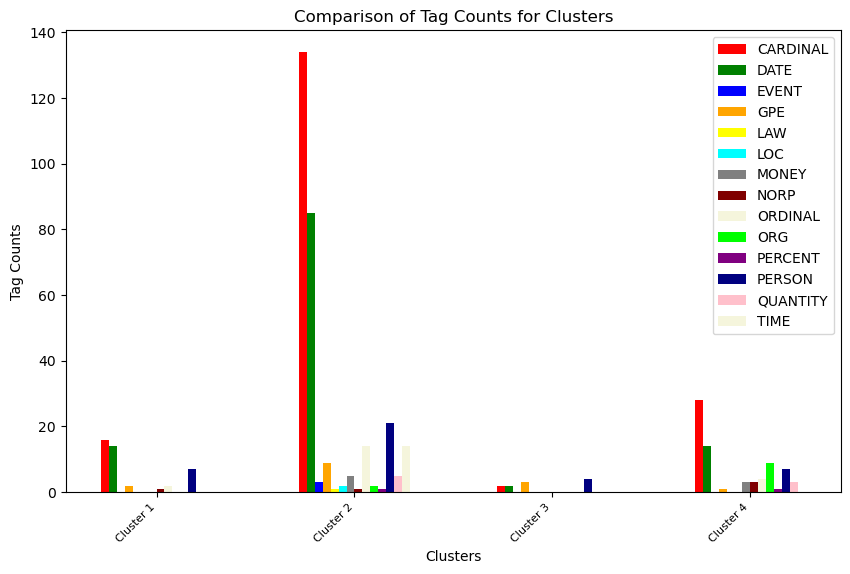

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Tag counts for each cluster
tag_counts = {
    'Cluster 1': entities_dict0,
    'Cluster 2': entities_dict1,
    'Cluster 3': entities_dict2,
    'Cluster 4': entities_dict3
}

# Get all unique tags
tags = sorted(set(tag for cluster_tags in tag_counts.values() for tag in cluster_tags.keys()))

# Get the count for each tag in each cluster
counts = [[tag_counts[cluster].get(tag, 0) for tag in tags] for cluster in clusters]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the spacing between clusters
bar_width = 0.04
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'gray','maroon',
          'Beige', 'lime', 'purple', 'Navy','Pink', 'Beige', 'Teal', 'Magenta'] 

# Set the positions of the bars on the x-axis
x = np.arange(len(clusters))

# Plot the bars for each tag
for i, tag in enumerate(tags):
    plt.bar(x + i * (bar_width), [count[i] for count in counts], width=bar_width, label=tag, color=colors[i % len(colors)])

# Set the x-axis labels and title
plt.xlabel('Clusters')
plt.ylabel('Tag Counts')
plt.title('Comparison of Tag Counts for Clusters')

# Set the x-axis tick positions and labels with increased boundaries
plt.xticks(x + ((len(tags) - 1) * bar_width) / 2, clusters, fontsize=8, rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()